In [2]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# inbuilt seaborn dataset
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [5]:
# import the tips data from seaborn
data = sns.load_dataset('tips')

# data sample
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
# data volume
data.shape

(244, 7)

In [7]:
# data types
data.dtypes

,0
total_bill,float64
tip,float64
sex,category
smoker,category
day,category
time,category
size,int64


In [8]:
# null value check
data.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [9]:
# average, median bill amount
print('Average bill amount:',data['total_bill'].mean().round(2))
print('Average bill amount:',round(data['total_bill'].median(),2))

# Average tip amount
print('\nAverage tip amount:',data['tip'].mean().round(2))
print('Average tip amount:',data['tip'].mean().round(2))

Average bill amount: 19.79
Average bill amount: 17.8

Average tip amount: 3.0
Average tip amount: 3.0


In [10]:
# five number summary for the bill

print('Min:',data['total_bill'].min())
print('Q1:',data['total_bill'].quantile(0.25))
print('Q2:',data['total_bill'].median())
print('Q3:',data['total_bill'].quantile(0.75).round(2))
print('Max:',data['total_bill'].max())

Min: 3.07
Q1: 13.3475
Q2: 17.795
Q3: 24.13
Max: 50.81


In [11]:
# lets investigate data b/w q3 and max
print('Q3:',data['total_bill'].quantile(0.75).round(2))
print('85%:',data['total_bill'].quantile(0.85))
print('90%:',data['total_bill'].quantile(0.90))
print('Max:',data['total_bill'].max())

Q3: 24.13
85%: 28.78099999999999
90%: 32.23500000000001
Max: 50.81


In [12]:
# data statisitcal method
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [13]:
# data statisitcal method by user defined quantiles
data.describe(percentiles=[ 0.5, 0.75, 0.9, 0.95, 0.99])

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
90%,32.235000,5.000000,4.000000
95%,38.061000,5.195500,4.000000
99%,48.227000,7.214500,6.000000
max,50.810000,10.000000,6.000000


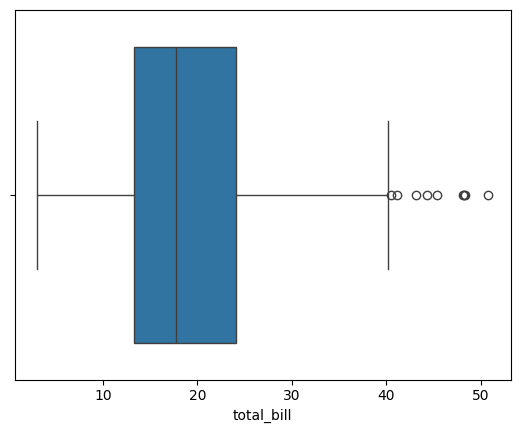

In [14]:
# boxplot for total bill cloumn
sns.boxplot(data['total_bill'], orient = 'h')
plt.show()

In [15]:
# what is upper and lower fence values for total bill column

Q1 = data['total_bill'].quantile(0.25)
Q3 = data['total_bill'].quantile(0.75)
iqr = Q3 - Q1
print('IQR:',iqr)

# fences
lower_fence=Q1-1.5*iqr
upper_fence=Q3+1.5*iqr
print('Lower Fence:',lower_fence)
print('Upper Fence:',upper_fence)

IQR: 10.779999999999998
Lower Fence: -2.8224999999999945
Upper Fence: 40.29749999999999


In [16]:
# datapoints that are outliers in total bill

data[data['total_bill']>upper_fence]

,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
102,44.30,2.50,Female,Yes,Sat,Dinner,3
142,41.19,5.00,Male,No,Thur,Lunch,5
156,48.17,5.00,Male,No,Sun,Dinner,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
182,45.35,3.50,Male,Yes,Sun,Dinner,3
184,40.55,3.00,Male,Yes,Sun,Dinner,2
197,43.11,5.00,Female,Yes,Thur,Lunch,4
212,48.33,9.00,Male,No,Sat,Dinner,4


Categorical Column Descriptive Stats

In [17]:
# data import
penguin_data = sns.load_dataset('penguins')

# data sample
penguin_data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [18]:
# datatype and missing value in each column

data_info = pd.DataFrame({
    'Missing_percentage':round(penguin_data.isnull().mean()*100,2),
    'Data_type':penguin_data.dtypes
})
data_info

,Missing_percentage,Data_type
species,0.00,object
island,0.00,object
bill_length_mm,0.58,float64
bill_depth_mm,0.58,float64
flipper_length_mm,0.58,float64
body_mass_g,0.58,float64
sex,3.20,object


In [19]:
# treat missing value for the categorical column
penguin_data['sex'].mode()[0]

penguin_data['sex'] = penguin_data['sex'].fillna(penguin_data['sex'].mode()[0])

data_info = pd.DataFrame({
    'Missing_percentage':round(penguin_data.isnull().mean()*100,2),
    'Data_type':penguin_data.dtypes
})
data_info

,Missing_percentage,Data_type
species,0.00,object
island,0.00,object
bill_length_mm,0.58,float64
bill_depth_mm,0.58,float64
flipper_length_mm,0.58,float64
body_mass_g,0.58,float64
sex,0.00,object


In [20]:
penguin_data['sex'].value_counts()

,count
sex,
Male,179
Female,165


In [21]:
# understand the categorical variables

for col in penguin_data.columns:
  if penguin_data[col].dtypes == 'object':
    print(col,':',penguin_data[col].unique())

species : ['Adelie' 'Chinstrap' 'Gentoo']
island : ['Torgersen' 'Biscoe' 'Dream']
sex : ['Male' 'Female']


In [22]:
# understand the species column as table
penguin_data['species'].value_counts()

,count
species,
Adelie,152
Gentoo,124
Chinstrap,68


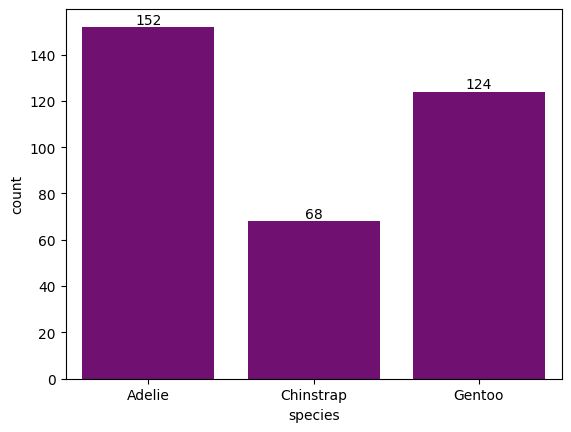

In [23]:
# understand the species column as graph
# sns.countplot(data=penguin_data, x='species')
ax = sns.countplot(x=penguin_data['species'], color='purple',) # another way
ax.bar_label(ax.containers[0])
plt.show()

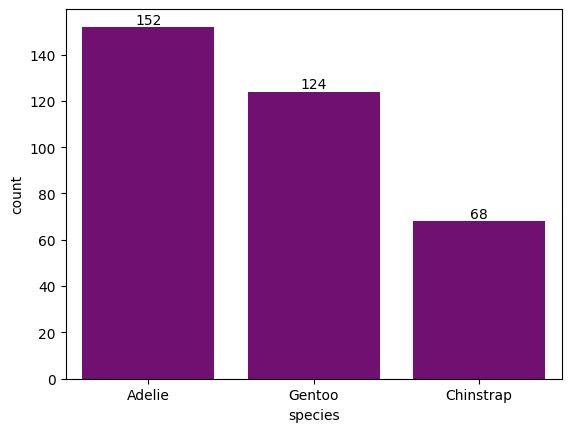

In [24]:
# understand the species column as graph
ax = sns.countplot(x=penguin_data['species'], color='purple', order=['Adelie','Gentoo','Chinstrap']) #manul
ax.bar_label(ax.containers[0])
plt.show()

In [25]:
penguin_data['species'].value_counts().index

Index(['Adelie', 'Gentoo', 'Chinstrap'], dtype='object', name='species')

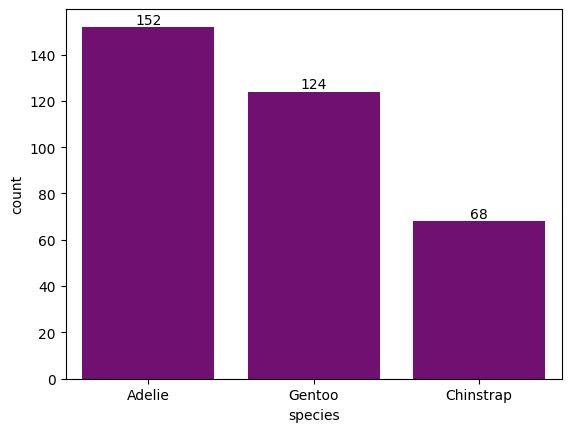

In [26]:
# understand the species column as graph
# sns.countplot(data=penguin_data, x='species')
ax = sns.countplot(x=penguin_data['species'], color='purple', order=penguin_data['species'].value_counts().index) # another way
ax.bar_label(ax.containers[0])
plt.show()

In [27]:
# understand the species column as proportion table
round(penguin_data['species'].value_counts(normalize=True)*100,2)

,proportion
species,
Adelie,44.19
Gentoo,36.05
Chinstrap,19.77


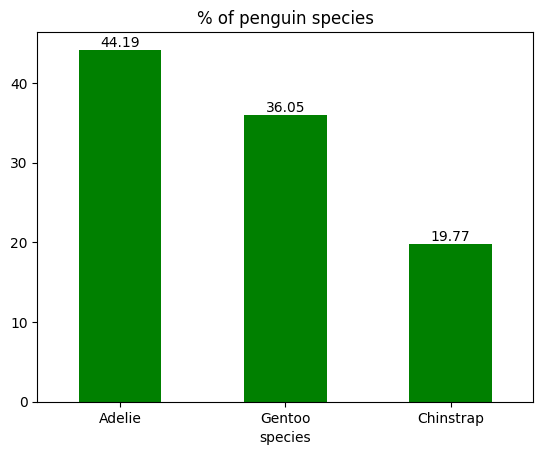

In [28]:
# plot the data as percentage instead of count
ax = round(penguin_data['species'].value_counts(normalize=True)*100,2).plot.bar(color='green')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=0)
plt.title('% of penguin species')
plt.show()

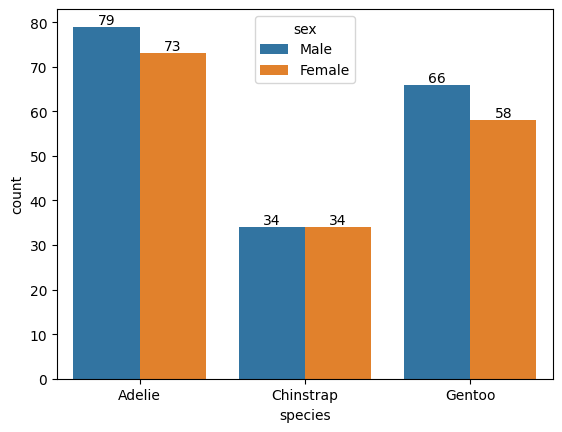

In [29]:
ax = sns.countplot(x=penguin_data['species'], hue=penguin_data['sex'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

In [30]:
# -- tips data
# # 1. check boxplot for other numerical columns in the tips data
# # 2. use "tips" dataset and find insights of categorical columns

# -- Penguin data
# # 3. Plot the count plot for all categorical variables using loops arranged in descending order of class
# # 4. use "penguin" dataset and find the numerical summary
# # 5. check the outliers in the penguin data

In [31]:
# 1. check boxplot for other numerical columns in the tips data

for col in data.columns:
  print(col)

total_bill
tip
sex
smoker
day
time
size


In [33]:
data.dtypes

,0
total_bill,float64
tip,float64
sex,category
smoker,category
day,category
time,category
size,int64


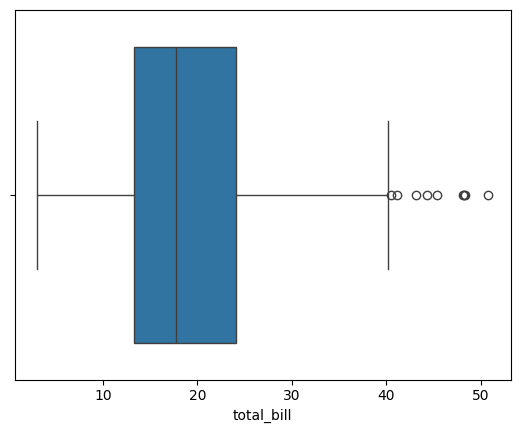

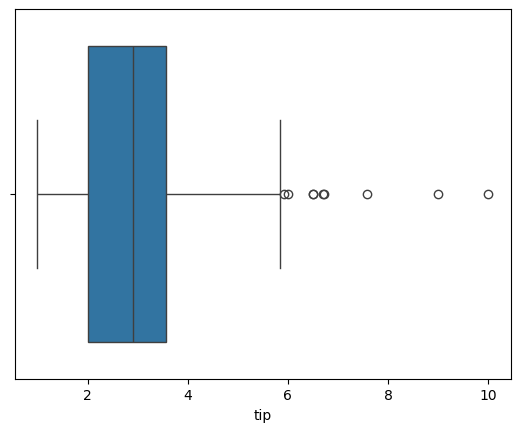

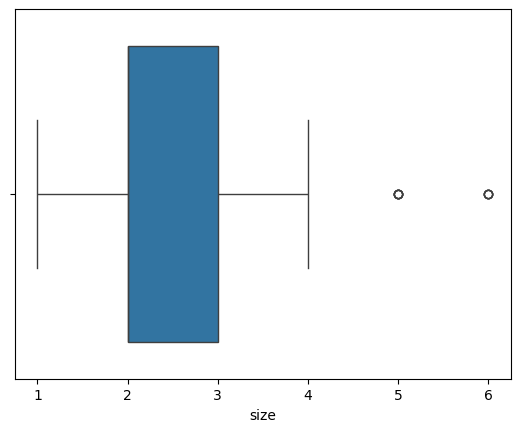

In [34]:
for col in data.columns:
  if data[col].dtypes !='category':
    sns.boxplot(data[col], orient='h')
    plt.show()

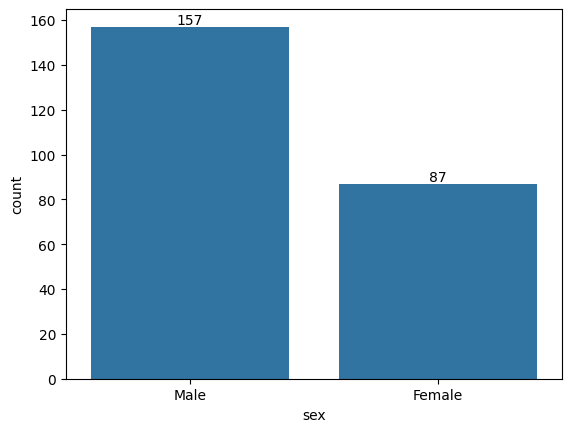

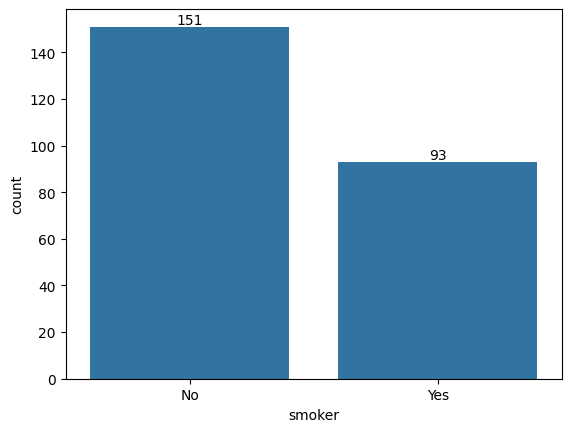

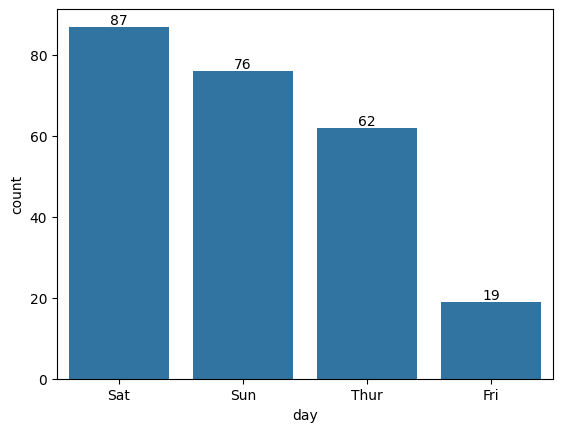

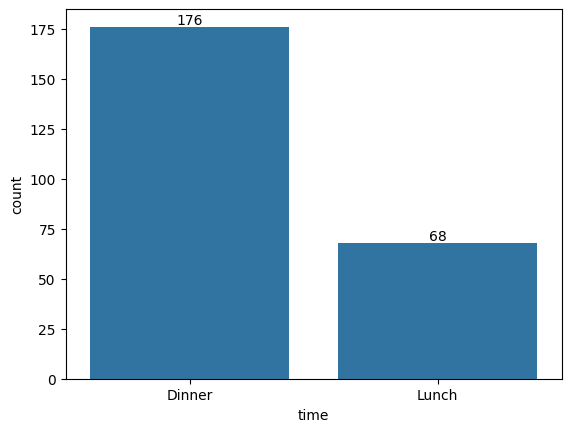

In [43]:
# # 2. use "tips" dataset and find insights of categorical columns

# lets change the category column to object data type
for col in data.columns:
  if data[col].dtype == 'category':
    data[col]=data[col].astype('object')

# checking the datatype after typecasting
data.dtypes

# count plot for all categorical columns
for col in data.columns:
  if data[col].dtype == 'O':
    ax = sns.countplot(x = data[col], order=(data[col].value_counts().index))
    ax.bar_label(ax.containers[0])
    plt.show()

In [39]:
data['sex'].value_counts().index

Index(['Male', 'Female'], dtype='object', name='sex')

In [ ]:
# -- Penguin data
# # 3. Plot the count plot for all categorical variables using loops arranged in descending order of class
# # 4. use "penguin" dataset and find the numerical summary
# # 5. check the outliers in the penguin data

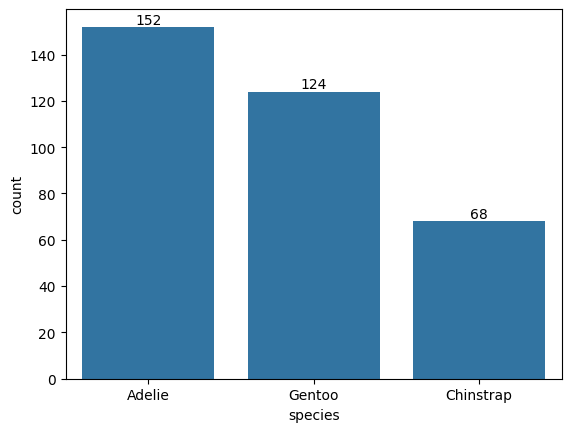

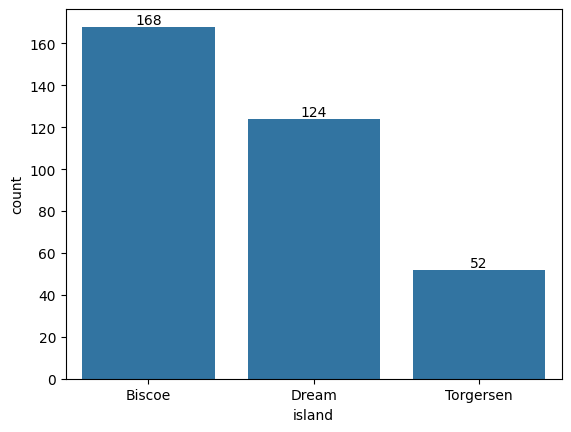

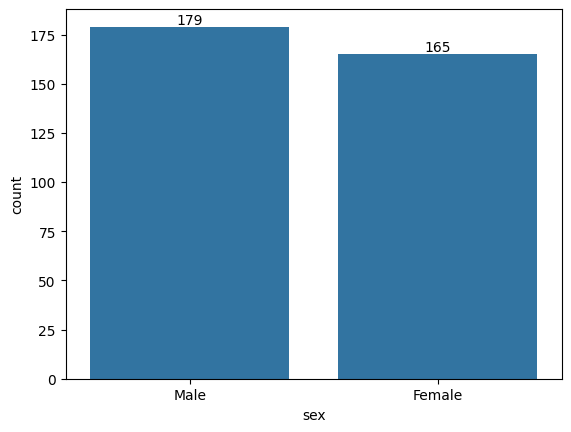

In [45]:
# 3. Plot the count plot for all categorical variables using loops arranged in descending order of class
for col in penguin_data.columns:
  if penguin_data[col].dtype =='O':
    ax = sns.countplot(x=penguin_data[col], order=penguin_data[col].value_counts().index)
    ax.bar_label(ax.containers[0])
    plt.show()

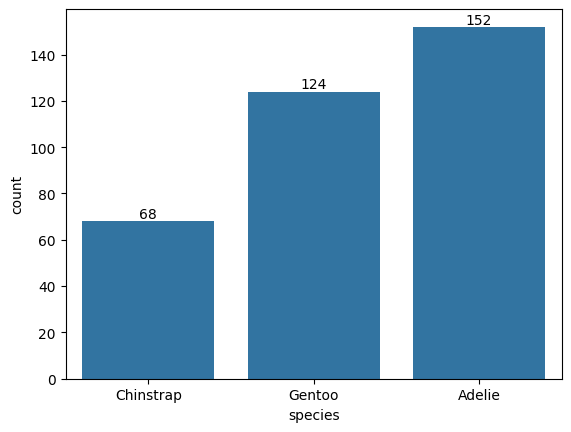

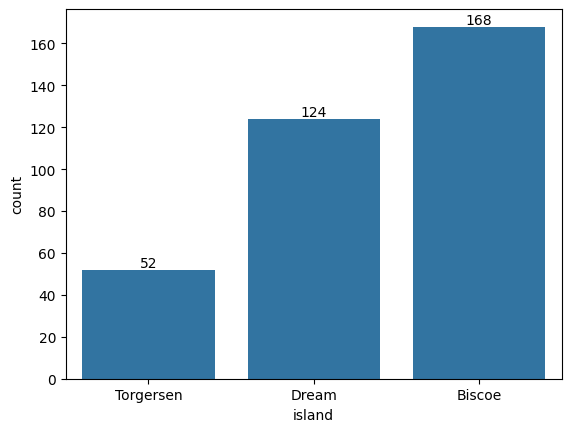

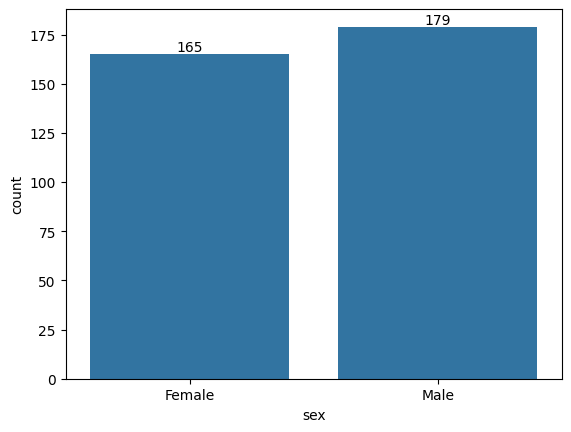

In [46]:
# for ascending order
for col in penguin_data.columns:
  if penguin_data[col].dtype =='O':
    ax = sns.countplot(x=penguin_data[col], order=penguin_data[col].value_counts(ascending=True).index)
    ax.bar_label(ax.containers[0])
    plt.show()

In [47]:
# 4. use "penguin" dataset and find the numerical summary
penguin_data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


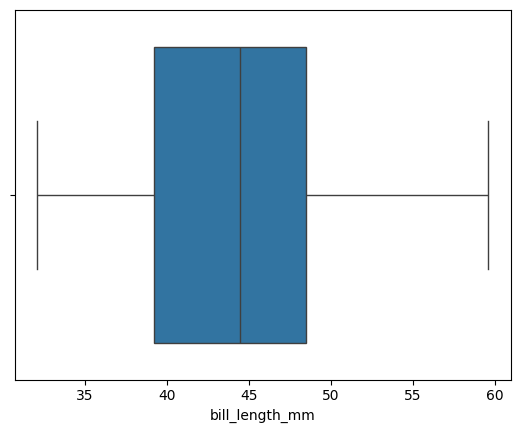

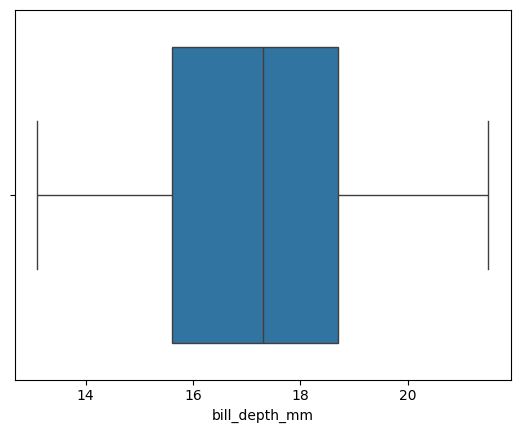

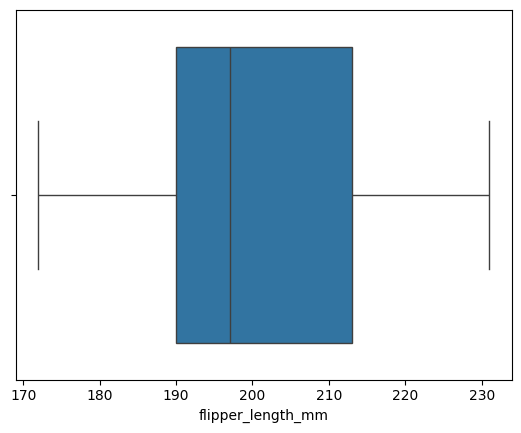

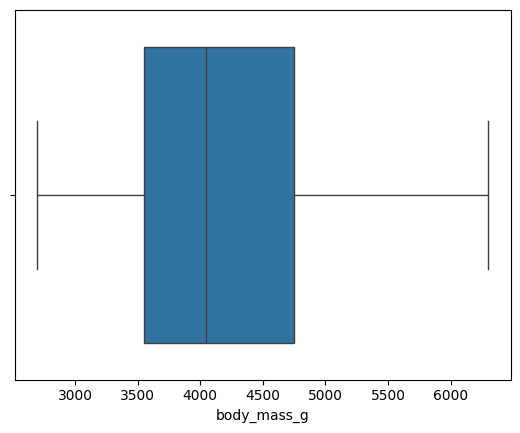

In [50]:
# 5. check the outliers in the penguin data
for col in penguin_data.columns:
  if penguin_data[col].dtype !='O':
    sns.boxplot(penguin_data[col], orient='h')
    plt.show()

In [51]:
# inspecting the body mass for distribution

q1 = penguin_data['body_mass_g'].quantile(0.25)
q3 = penguin_data['body_mass_g'].quantile(0.75)

iqr = q3 - q1

l_fence = q1 - 1.5*iqr
u_fence = q3 + 1.5*iqr


print('Lower Fence Value is:', l_fence, '\nUpper Fence Value is:', u_fence, )
print('Min value is:', penguin_data['body_mass_g'].min(), '\nMax value is:', penguin_data['body_mass_g'].max())

Lower Fence Value is: 1750.0 
Upper Fence Value is: 6550.0
Min value is: 2700.0 
Max value is: 6300.0
